In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_paths=glob.glob('../experiments/bootstrapping/bootstrapping_all_experiments/bootstrapping_new_part_all_experiments/bootstrapping*.csv')

In [3]:
df=pd.DataFrame()

for path in data_paths:
    split=path.split('-')
    audio_type=split[0].split('partition_')[-1]
    experiment=split[-1].replace('.csv','')
    df_=pd.read_csv(path)
    df_['experiment']=experiment
    df_['audio_type']=audio_type
    df=pd.concat([df,df_])

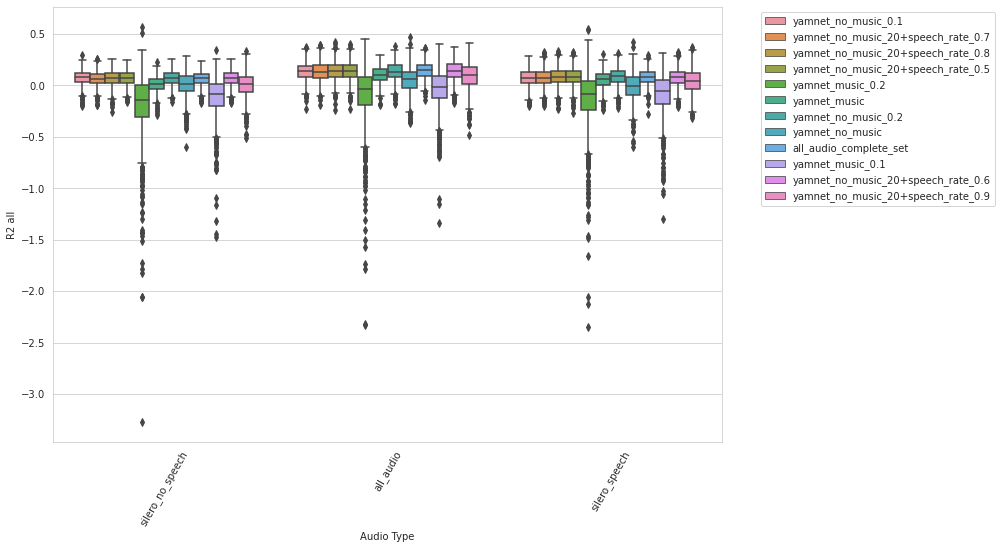

In [5]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.boxplot(x="audio_type", y="r2", hue="experiment",data=df)
ax.set(xlabel='Audio Type', ylabel='R2 all')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

All audio - full dataset

In [15]:
all_audio_complete_set=df[(df['audio_type']=='all_audio') & (df['experiment']=='all_audio_complete_set')]

In [18]:
all_audio_complete_set.describe()

,Unnamed: 0,r2,r,MAE,MSE,RMSE
count,1000.000000,1000.000000,960.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.141717,0.373176,0.106566,0.017922,0.133659
std,288.819436,0.076572,0.098541,0.005966,0.002035,0.007537
min,0.000000,-0.139922,0.040555,0.090766,0.013195,0.114870
25%,249.750000,0.093333,0.315967,0.102424,0.016487,0.128402
50%,499.500000,0.143976,0.384650,0.106190,0.017777,0.133330
75%,749.250000,0.194349,0.443515,0.110299,0.019153,0.138394
max,999.000000,0.360164,0.600136,0.129664,0.027502,0.165838


<AxesSubplot:xlabel='r2', ylabel='Density'>

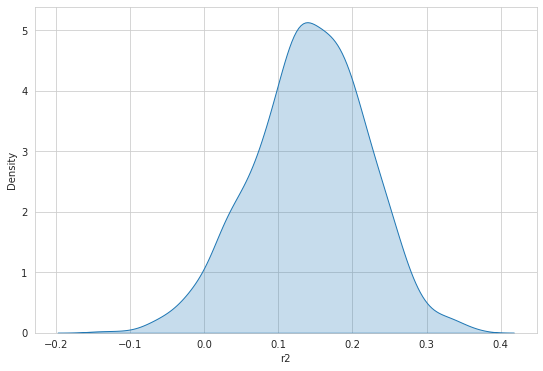

In [16]:
import warnings 

warnings.filterwarnings('ignore')
plt.figure(figsize=(9, 6))
r2_new=all_audio_complete_set ['r2']
sns.distplot(r2_new, hist = False, kde = True, kde_kws={"shade": True},label='r2 new parts')